## Final Project Submission

Please fill out:
* Student name: Gabe Vazquez
* Student pace: part time 
* Scheduled project review date/time: 1/24: 6PM
* Instructor name: Jeff Herman
* Blog post URL:


# Obtaining the Data

In [1]:
import pandas as pd

In [2]:
#import the data
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Scrubbing the Data

In [3]:
#import neccessary packages asd set them to their standard alias
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Checklist:

1. Check data types and null values.
* Check if we need/ can create a subset of the data.
* Check for multicollinearity - determine if we have columns that are highly correlated
* Should any columns be removed becuase they do not contain useful information?
* Scale / Normalize our numeric data?
* Deal with categorical columns by one-hot encoding.

#### 1. Check data types and null values.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


##### Data types

Invetigate the unique values inside of `condition` and `grade` becuase these might need to be set to categorical data sets. 

In [5]:
print("Condition:")
print(data.condition.unique())

print("Grade:")
print(data.grade.unique())

Condition:
[3 5 4 1 2]
Grade:
[ 7  6  8 11  9  5 10 12  4  3 13]


It appears that `condition` and `grade` should be categories instead of intergers.

In [6]:
data.condition = data.condition.astype("str")
print("Condition: ", data.condition.dtype)

data.grade = data.grade.astype("str")
print("Grade: ", data.grade.dtype)

Condition:  object
Grade:  object


Check that `sqft_basement` should be converted to a numeric value

In [7]:
data.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

`?` won't be able to be converted to a numeric value. Therefore, change all `?` values to `0`s in order to convert this column to floats.

In [8]:
data['sqft_basement'] = data['sqft_basement'].replace('?', 0) 

In [9]:
data.sqft_basement = data.sqft_basement.astype("float")
print("Sqft Basement: ", data.sqft_basement.dtype)

Sqft Basement:  float64


##### Null values

Inspect the data set for null values. These will want to be removed prior to modelling.

In [10]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Because there are so few null values for `view` in prportion the rest of the data set, these null rows can simply be removed.

In [13]:
data = data.dropna(subset=['view'])

The remaining `view` values can be converted to categorical data.

In [14]:
data.view = data.view.astype("str")
print("View: ", data.view.dtype)

View:  object


Further inspect the unique values in `waterfront` and `yr_renovated` to determine its value to the data set.

In [15]:
print("-----Waterfront-----")
print(data.waterfront.unique())
print(data.waterfront.value_counts())

print("-----Year Renovated-----")
print(data.yr_renovated.unique())

-----Waterfront-----
[nan  0.  1.]
0.0    19019
1.0      145
Name: waterfront, dtype: int64
-----Year Renovated-----
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


Convert `waterfront` to categorical data.

In [16]:
data.waterfront = data.waterfront.astype("str")
print("Waterfront: ", data.waterfront.dtype)

Waterfront:  object


Convert `yr_renovated` null values to 0

In [17]:
data['yr_renovated'] = data['yr_renovated'].fillna(0) 

Confirm no more `null` values exist in the data set.

In [18]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### 2. Check if we need/ can create a subset of the data.

In [19]:
len(data)

21534

This is a large enough data set, to build a model on a subset of the data in order to increase the speed during the modeling step. 

The `NaN` string values that have been created in the step prior can be removed in order to create this subset.

In [20]:
data = data[data.waterfront != 'nan']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 21 columns):
id               19164 non-null int64
date             19164 non-null object
price            19164 non-null float64
bedrooms         19164 non-null int64
bathrooms        19164 non-null float64
sqft_living      19164 non-null int64
sqft_lot         19164 non-null int64
floors           19164 non-null float64
waterfront       19164 non-null object
view             19164 non-null object
condition        19164 non-null object
grade            19164 non-null object
sqft_above       19164 non-null int64
sqft_basement    19164 non-null float64
yr_built         19164 non-null int64
yr_renovated     19164 non-null float64
zipcode          19164 non-null int64
lat              19164 non-null float64
long             19164 non-null float64
sqft_living15    19164 non-null int64
sqft_lot15       19164 non-null int64
dtypes: float64(7), int64(9), object(5)
memory usage: 3.2+ MB


#### 3. Check for multicollinearity - determine if we have columns/ predictors that are highly correlated

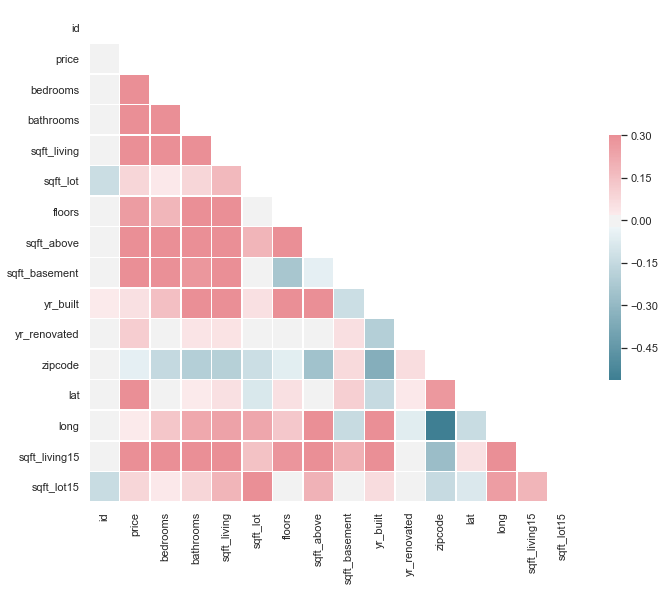

In [21]:
# Set Style
sns.set(style="whitegrid")

#Create Covariance matrix
corr = data.corr()

# Generate a mask the size of the covariance matrix (to prevent invalid data)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Gernerate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, 
            square=True, linewidth=.5, cbar_kws={"shrink":.5})

#### 4. Should any columns be removed becuase they do not contain useful information?

As shown in the heat map above `id` does not have any correlation with most of the data set, so it is best to remove it

In [23]:
data = data.drop('id', 1)

KeyError: "['id'] not found in axis"

#### 5. Normalize our numeric data (using their z-score)

Check to see what our data currently looks like

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a166217b8>,
      dtype=object)

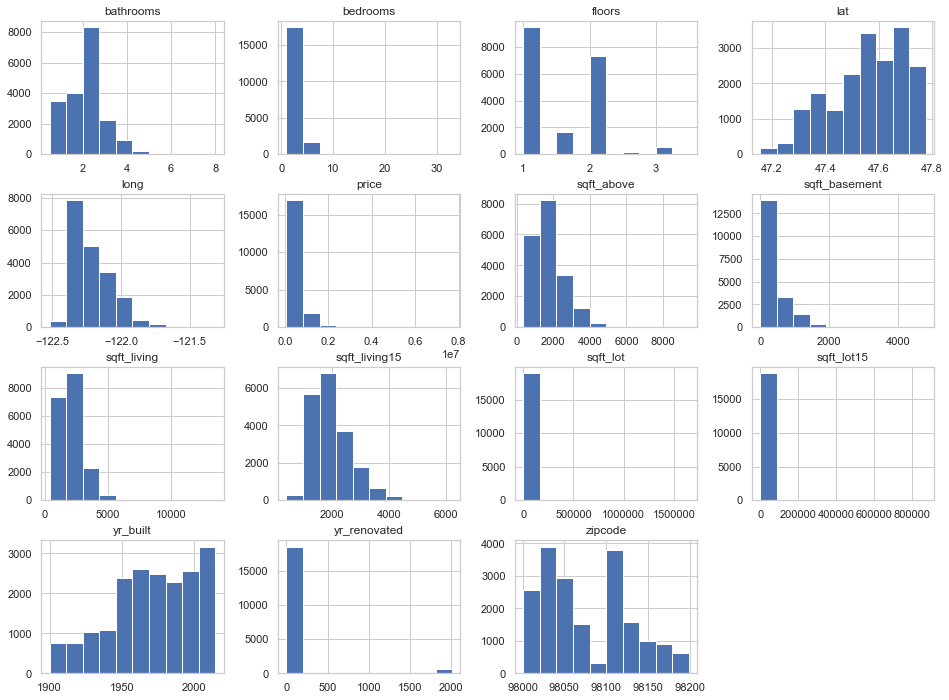

In [26]:
data.hist(figsize=[16,12])

Normalize the skewed data.

In [27]:
skewed = ['bedrooms', 'price', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living', 'sqft_lot', 'yr_renovated']

for predictor in skewed:
    data[predictor] = np.log(data[predictor])
    
data.describe()

/Users/gabe/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,1.916400e+04,19164.000000,1.916400e+04,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000
mean,13.049479,1.178172,2.117029,2.020110,8.991369,1.495173,7.396138,-inf,1971.039553,-inf,98077.726466,47.560018,-122.214011,1987.221874,12797.653882
std,0.527182,0.283247,0.769241,0.056544,0.903029,0.540308,0.428558,NaN,29.388020,NaN,53.448716,0.138661,0.140728,684.787028,27552.634083
min,11.264464,0.000000,0.500000,1.777238,6.253829,1.000000,5.913503,-inf,1900.000000,-inf,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,12.682307,1.098612,1.750000,1.983127,8.525161,1.000000,7.090077,-inf,1951.000000,-inf,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,13.017003,1.098612,2.250000,2.022882,8.938532,1.500000,7.352441,-inf,1975.000000,-inf,98065.000000,47.572000,-122.231000,1840.000000,7620.000000
75%,13.375396,1.386294,2.500000,2.059730,9.279866,2.000000,7.704248,6.291569e+00,1997.000000,-inf,98117.000000,47.678100,-122.125000,2360.000000,10093.250000
max,15.856731,3.496508,8.000000,2.252702,14.317109,3.500000,9.149528,8.480529e+00,2015.000000,7.608374e+00,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Check how many negative values there are in the `sqft_basement` and `yr_renovated` columns.

In [28]:
print(sum(data["sqft_basement"]<=0))
print(sum(data["yr_renovated"]<=0))

11794
18513


Check to see if makes sense to convert them to their respective medians so as to not disrupt the rest of the aligned data

In [29]:
basement_median = data.sqft_basement.median()
yr_renovated_median = data.yr_renovated.median()

print(basement_median)
print(yr_renovated_median)

-inf
-inf


Convert these numbers the neg numbers to 0

In [30]:
for i in data.sqft_basement:
    if i <= 0:
        data.sqft_basement = data['sqft_basement'].replace(i, 0) 

In [31]:
for i in data.yr_renovated:
    if i <= 0:
        data.yr_renovated = data['yr_renovated'].replace(i, 0) 

In [32]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000
mean,13.049479,1.178172,2.117029,2.020110,8.991369,1.495173,7.396138,2.474240,1971.039553,0.258134,98077.726466,47.560018,-122.214011,1987.221874,12797.653882
std,0.527182,0.283247,0.769241,0.056544,0.903029,0.540308,0.428558,3.154943,29.388020,1.376590,53.448716,0.138661,0.140728,684.787028,27552.634083
min,11.264464,0.000000,0.500000,1.777238,6.253829,1.000000,5.913503,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,12.682307,1.098612,1.750000,1.983127,8.525161,1.000000,7.090077,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,13.017003,1.098612,2.250000,2.022882,8.938532,1.500000,7.352441,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.231000,1840.000000,7620.000000
75%,13.375396,1.386294,2.500000,2.059730,9.279866,2.000000,7.704248,6.291569,1997.000000,0.000000,98117.000000,47.678100,-122.125000,2360.000000,10093.250000
max,15.856731,3.496508,8.000000,2.252702,14.317109,3.500000,9.149528,8.480529,2015.000000,7.608374,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Scale the data with z-score transformation.

In [33]:
data.price = (data.price - data.price.mean()) / data.price.std()
data.bedrooms = (data.bedrooms - data.bedrooms.mean()) / data.bedrooms.std()
data.bathrooms = (data.bathrooms - data.bathrooms.mean()) / data.bathrooms.std()
data.sqft_living = (data.sqft_living - data.sqft_living.mean()) / data.sqft_living.std()
data.sqft_lot = (data.sqft_lot - data.sqft_lot.mean()) / data.sqft_lot.std()
data.floors = (data.floors - data.floors.mean()) / data.floors.std()
data.sqft_above = (data.sqft_above - data.sqft_above.mean()) / data.sqft_above.std()
data.sqft_basement = (data.sqft_basement - data.sqft_basement.mean()) / data.sqft_basement.std()
data.yr_built = (data.yr_built - data.yr_built.mean()) / data.yr_built.std()
data.yr_renovated = (data.yr_renovated - data.yr_renovated.mean()) / data.yr_renovated.std()
data.lat = (data.lat - data.lat.mean()) / data.lat.std()
data.long = (data.long - data.long.mean()) / data.long.std()
data.sqft_living15 = (data.sqft_living15 - data.sqft_living15.mean()) / data.sqft_living15.std()
data.sqft_lot15 = (data.sqft_lot15 - data.sqft_lot15.mean()) / data.sqft_lot15.std()

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.hist(figsize=[16,12])

#### 6. Deal with categorical columns by one-hot encoding.

To be completed after data exploration so as to make it more convenient view data.

In [ ]:
data_cleaned = pd.get_dummies(data)
data_cleaned.head()

# Exploring the Data

In [ ]:
data.head()

In [ ]:
data.describe()

Above shows basic statistics for all the "numerical" columns in the dataset.

In [ ]:
data.hist(figsize=(20,18))

* Most of the variables clearly break the normal assumption
* There are some obvious outliers in some columns 
* Data might need extra preprocessing to clean it up a bit more

In [ ]:
for column in ['bathrooms',
       'bedrooms', 'floors', 'lat', 'long', 'price', 
               'sqft_above', 'sqft_basement', 'yr_built', 
               'yr_renovated', 'sqft_living', 'sqft_living15',
              'sqft_lot', 'sqft_lot15']:
    data[column].plot.hist(normed=True )
    data[column].plot.kde(label=column )
    plt.legend()
    plt.show()

* This further confirms our observations from  simple histograms
* A number of distributions are multimodal - they have more than one "typical values"
* We may need to generate separate plots while fine tuning the number of bins to view the data in a better way

#### Further asses the data with a joint plot

In [ ]:
for column in ['bathrooms',
       'bedrooms', 'floors', 'lat', 'long', 'price', 
               'sqft_above', 'sqft_basement', 'yr_built', 
               'yr_renovated', 'sqft_living', 'sqft_living15',
              'sqft_lot', 'sqft_lot15']:
    sns.jointplot(x=column, y="price",
                  data=data, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})

    plt.legend()
    plt.show()

* Joint plots further confirm our observations we made earlier.
* Some distributions are *almost* uniformly distributed while other have multiple common values
* `bathrooms`, `bedrooms`, `sqft_above`, `sqft_living`, and `sqft_living15` have strong positive correlation with price
* `long`, `yr_built`, and `yr_renovated` almost have no clear relationship with sales.
* For above variables we see a straightline along the y-intercept i.e. no slope > no linear relation
* The `sqft` variables have the best poritive relationship with `price`

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.info()

In [ ]:
data['month'] = data['date'].dt.month

In [ ]:
data.head()

In [ ]:
data['month']  = data['month'].astype("str")

In [ ]:
data.drop('date', inplace=True, axis=1)

In [ ]:
data.head()

# Modeling the Data

In [ ]:
data_cleaned = pd.get_dummies(data)

In [ ]:
data_cleaned.head()

In [ ]:
data_cleaned.info()

View `info` for the numerical data

In [ ]:
data_cleaned.iloc[:,0:10].info()

Ensure all dummy columns are tagged as categorical variables.

In [ ]:
for cat_names in data_cleaned.iloc[:,10:].columns:
         data_cleaned[cat_names] = data_cleaned[cat_names].astype('category')

In [ ]:
print(data.view.dtype)

In [ ]:
data_cleaned.describe()

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
data_cleaned.describe().columns.drop(['price'])

In [ ]:
col_names = data_cleaned.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("KC House: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=data_cleaned).fit()
    X_new = pd.DataFrame({val: [data_cleaned[val].min(), data_cleaned[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

In [ ]:
pd.DataFrame(results)

* What do the parameter estimates mean? Do they make sense?
* What do the p-values tell us?
* What does the R-squared tell us?

`yr_renovated` is the most skewed. Mean-transform to see what happens.

In [ ]:
mt_yr = ((data_cleaned.yr_renovated - data_cleaned.yr_renovated.mean()) / data_cleaned.yr_renovated.std())
mt_yr.hist()

Convert `yr_renovated` to categorical data

In [ ]:
data_cleaned.yr_renovated = data_cleaned.yr_renovated.astype("str")
print("Yr_Renovated: ", data_cleaned.yr_renovated.dtype)

In [ ]:
for i in range(0,len(data_cleaned.columns)):
               print(i,data_cleaned.columns[i])

Rename all columns that have a '.' or '/'. They will hinder our model from running.

In [ ]:
data_cleaned = data_cleaned.rename(columns={'waterfront_0.0': 'waterfront_0', 'waterfront_1.0': 'waterfront_1', 
                                            'view_0.0': 'view_0', 'view_1.0': 'view_1', 'view_2.0': 'view_2',
                                           'view_3.0': 'view_3', 'view_4.0': 'view_4'})

In [ ]:
for i in range(0,len(data_cleaned.columns)):
               data_cleaned.columns[i]

In [ ]:
cols_waterfront = data_cleaned.columns[15:16]
cols_view = data_cleaned.columns[17:21]
cols_condition = data_cleaned.columns[22:26]
cols_grade = data_cleaned.columns[27:37]
cols_month= data_cleaned.columns[38:49]

cols = [cols_waterfront , cols_view, cols_condition, cols_grade, cols_month]
for col in cols:
    sum_cols = "+".join(col)
    form = "price ~" + sum_cols
    model = smf.ols(formula= form, data= data_cleaned).fit()
    print(model.summary())

* Drop continuous variables which resulted in single linear models with a R-squared value < 0.01.
* Drop 1 column for each categorical variable we end up using.

In [ ]:
kc_house_final = data_cleaned.drop(["yr_built"], axis=1)
kc_house_final.describe()

### Feature ranking with recursive feature elimination

Create a matrix X and y containing the predictors and target for the model. Use Scikit-Learn's RFE function, documentation.

In [ ]:
y = kc_house_final[["price"]]
X = kc_house_final.drop(["price"], axis=1)
X.head()

Create a for loop using RFE where we look at the 5, 15, 25,... up until 85 best features to be selected according to the feature ranking algorithm. Store the R-squared and the adjusted-R-squareds for all these models in a list.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [ ]:
r_list = []
adj_r_list = []
list_n = list(range(5,45,5))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

The difference between $R^2$ and adjusted $R^2$ is negligible, and seems to continue to be going up as we include more features. Remember though that we're likely overfitting when including 85 features. In order to identify this, let's rerun a similar experiment, but using a train test split!

### Train-test-split

Create a similar for loop to before. Except, this time

* Use a train test split of 20-80
* Instead of looking at $R^2$ and $R^2_{adj}$, look at the MSE for train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)y

##### What we see is that both MSE keeps improving when we add variables. It seems like a bigger model improves our performance, and the test and train performance don't really diverge. It is important to note however that is not an unusual result. The performance measures used typically will show this type of behavior. In order to really be able to balance the curse of dimensionality (which will become more important in machine learning), we need other information criteria such as AIC and BIC. You'll learn about them later! Now, let's perform cross-validation on our model with 85 predictors!

### 10-fold cross validation with the final model

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# select 85 best predictors

select_85 = RFE(linreg, n_features_to_select = 85)
select_85 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

Running our 10-fold cross-validation highlights some issues for sure! Have a look at your list of 10 MSEs. Where most MSEs are manageable, some are very high. The cure of dimensionality is already pretty clear here. The issue is that we have many (dummy) categorical variables that result in columns with many zeroes and few ones. This means that for some folds, there is a risk of ending up with columns that almost exclusively contain 0's for prediction, which might cause weird results. Looking at this, a model with less predictors might make sense again. This is where we conclude for now. It's up to you now to explore other model options! Additionally, it is encouraged to try some of the "level up" exercises below. Good luck!

# Questions:

* "how did you pick the question(s) that you did?"
* "why are these questions important from a business perspective?"
* "how did you decide on the data cleaning options you performed?"
* "why did you choose a given method or library?"
* "why did you select those visualizations and what did you learn from each of them?"
* "why did you pick those features as predictors?"
* "how would you interpret the results?"
* "how confident are you in the predictive quality of the results?"
* "what are some of the things that could cause the results to be wrong?"

# Summary

This project goes through the OSEMN framework...